# KMeans

In [1]:
import pandas as pd

# adjustable item 1: csv
yearlyTableDf = pd.read_csv("mini_2019_table.csv")

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,type,continent,iso_country,country_name,state,iso_region,gps_code,local_code,municipality,tz
0,KLCK,0,0,0,1,0,0,0,1,0,...,large_airport,NA_,US,United States,Ohio,US-OH,KLCK,LCK,Columbus,America/New_York
1,KPDK,2,1,1,1,3,0,0,2,0,...,medium_airport,NA_,US,United States,Georgia,US-GA,KPDK,PDK,Atlanta,America/New_York
2,LYBE,0,0,0,1,0,0,0,1,0,...,large_airport,EU,RS,Serbia,NaN,RS-00,LYBE,NaN,Belgrade,Europe/Belgrade
3,RPUF,0,0,0,0,0,0,2,0,0,...,small_airport,AS,PH,Philippines,Central-Luzon,PH-PAM,RPUF,NaN,Floridablanca,Asia/Manila
4,WN61,0,1,0,0,0,0,1,0,0,...,small_airport,NA_,US,United States,Washington,US-WA,WN61,WN61,Spokane,America/Los_Angeles


In [2]:
from sklearn import preprocessing

# adjustable item 2: selected fields for clustering
selectedFields = ["domestic_origin", "domestic_destination", "international_origin", "international_destination", "day_origin", "night_origin", "day_destination", "night_destination", "long_origin", "medium_origin", "short_origin", "long_destination", "medium_destination", "short_destination", "AVG_TEMP", "AVG_MAX", "AVG_MIN", "AVG_PRCP"]

scaler = preprocessing.StandardScaler().fit(yearlyTableDf[selectedFields])
standardizedVariables = scaler.transform(yearlyTableDf[selectedFields])
standardizedVariables2 = standardizedVariables

from sklearn.cluster import KMeans
import numpy as np

# adjustable item 3: number of cluster
minNumCluster = 2
maxNumCluster = 9

for i in range(minNumCluster, maxNumCluster+1):
    mdl1 = KMeans(n_clusters=i, init="random", random_state=0)
    mdl1.fit(standardizedVariables)
    yearlyTableDf["Cluster(n="+str(i)+")"] = mdl1.labels_
    standardizedVariables2 = np.vstack((standardizedVariables2, mdl1.cluster_centers_))

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,municipality,tz,Cluster(n=2),Cluster(n=3),Cluster(n=4),Cluster(n=5),Cluster(n=6),Cluster(n=7),Cluster(n=8),Cluster(n=9)
0,KLCK,0,0,0,1,0,0,0,1,0,...,Columbus,America/New_York,0,2,2,2,2,2,2,5
1,KPDK,2,1,1,1,3,0,0,2,0,...,Atlanta,America/New_York,0,2,2,2,2,2,2,5
2,LYBE,0,0,0,1,0,0,0,1,0,...,Belgrade,Europe/Belgrade,0,0,3,4,4,4,4,0
3,RPUF,0,0,0,0,0,0,2,0,0,...,Floridablanca,Asia/Manila,0,2,2,2,2,2,7,2
4,WN61,0,1,0,0,0,0,1,0,0,...,Spokane,America/Los_Angeles,0,2,2,2,2,2,7,4


In [3]:
from sklearn.metrics import silhouette_score

for i in range(minNumCluster, maxNumCluster+1):
    clusterLabel = yearlyTableDf["Cluster(n="+str(i)+")"]
    silhouette_avg = silhouette_score(standardizedVariables, clusterLabel)
    for j in range(0, i):
        print("Cluster(n="+str(i)+") Group"+str(j)+" Row Counts: "+str(yearlyTableDf[clusterLabel==j].shape[0]))
    print("For Cluster(n="+str(i)+"), the Average Silhouette Score:", silhouette_avg)
    print("----------------------------------------------------------------------------------------------------")

Cluster(n=2) Group0 Row Counts: 734
Cluster(n=2) Group1 Row Counts: 24
For Cluster(n=2), the Average Silhouette Score: 0.8140267836546662
----------------------------------------------------------------------------------------------------
Cluster(n=3) Group0 Row Counts: 172
Cluster(n=3) Group1 Row Counts: 23
Cluster(n=3) Group2 Row Counts: 563
For Cluster(n=3), the Average Silhouette Score: 0.5769931779648659
----------------------------------------------------------------------------------------------------
Cluster(n=4) Group0 Row Counts: 42
Cluster(n=4) Group1 Row Counts: 12
Cluster(n=4) Group2 Row Counts: 535
Cluster(n=4) Group3 Row Counts: 169
For Cluster(n=4), the Average Silhouette Score: 0.6091034303000286
----------------------------------------------------------------------------------------------------
Cluster(n=5) Group0 Row Counts: 3
Cluster(n=5) Group1 Row Counts: 10
Cluster(n=5) Group2 Row Counts: 533
Cluster(n=5) Group3 Row Counts: 43
Cluster(n=5) Group4 Row Counts: 169


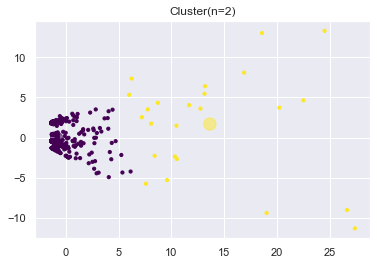

For Cluster(n=2), the Average Silhouette Score: 0.8140267836546662 



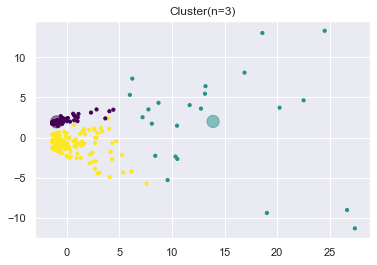

For Cluster(n=3), the Average Silhouette Score: 0.5769931779648659 



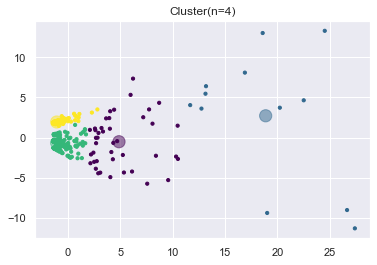

For Cluster(n=4), the Average Silhouette Score: 0.6091034303000286 



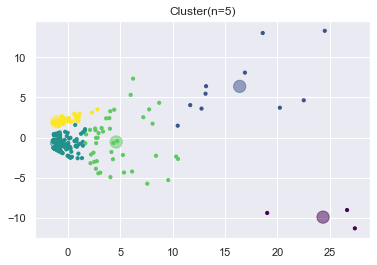

For Cluster(n=5), the Average Silhouette Score: 0.6131639274165044 



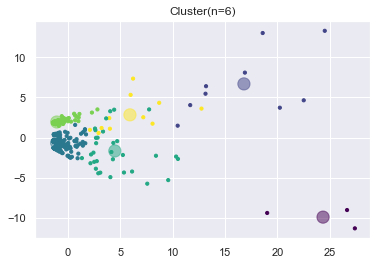

For Cluster(n=6), the Average Silhouette Score: 0.6181339742094752 



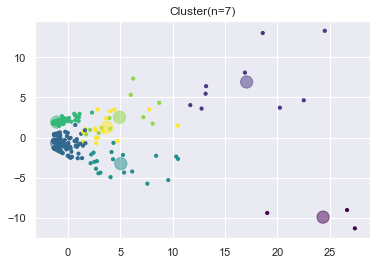

For Cluster(n=7), the Average Silhouette Score: 0.622352231477169 



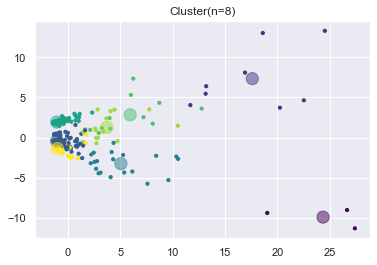

For Cluster(n=8), the Average Silhouette Score: 0.5408885560195199 



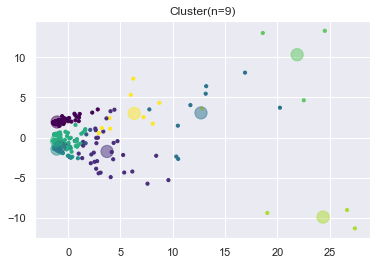

For Cluster(n=9), the Average Silhouette Score: 0.5401913498524599 



In [4]:
from sklearn.decomposition import PCA

mdl2 = PCA(n_components=2)
mdl2.fit(standardizedVariables2)
standardizedVariablesPCA = mdl2.transform(standardizedVariables2)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

k = yearlyTableDf.shape[0]
for i in range(minNumCluster, maxNumCluster+1):
    clusterLabel = yearlyTableDf["Cluster(n="+str(i)+")"]
    plt.title("Cluster(n="+str(i)+")")
    plt.scatter(standardizedVariablesPCA[:yearlyTableDf.shape[0], 0], standardizedVariablesPCA[:yearlyTableDf.shape[0], 1], c=clusterLabel, s=10, cmap="viridis")
    plt.scatter(standardizedVariablesPCA[k:(k+i), 0], standardizedVariablesPCA[k:(k+i), 1], c=sorted(clusterLabel.unique()), s=150, alpha=0.5, cmap="viridis")
    plt.show()
    k += i
    silhouette_avg = silhouette_score(standardizedVariables, clusterLabel)
    print("For Cluster(n="+str(i)+"), the Average Silhouette Score:", silhouette_avg, "\n")

# DBSCAN

In [5]:
import pandas as pd

# adjustable item 1: csv
yearlyTableDf = pd.read_csv("mini_2019_table.csv")

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,type,continent,iso_country,country_name,state,iso_region,gps_code,local_code,municipality,tz
0,KLCK,0,0,0,1,0,0,0,1,0,...,large_airport,NA_,US,United States,Ohio,US-OH,KLCK,LCK,Columbus,America/New_York
1,KPDK,2,1,1,1,3,0,0,2,0,...,medium_airport,NA_,US,United States,Georgia,US-GA,KPDK,PDK,Atlanta,America/New_York
2,LYBE,0,0,0,1,0,0,0,1,0,...,large_airport,EU,RS,Serbia,NaN,RS-00,LYBE,NaN,Belgrade,Europe/Belgrade
3,RPUF,0,0,0,0,0,0,2,0,0,...,small_airport,AS,PH,Philippines,Central-Luzon,PH-PAM,RPUF,NaN,Floridablanca,Asia/Manila
4,WN61,0,1,0,0,0,0,1,0,0,...,small_airport,NA_,US,United States,Washington,US-WA,WN61,WN61,Spokane,America/Los_Angeles


In [6]:
from sklearn import preprocessing

# adjustable item 2: selected fields for clustering
selectedFields = ["domestic_origin", "domestic_destination", "international_origin", "international_destination", "day_origin", "night_origin", "day_destination", "night_destination", "long_origin", "medium_origin", "short_origin", "long_destination", "medium_destination", "short_destination", "AVG_TEMP", "AVG_MAX", "AVG_MIN", "AVG_PRCP"]

scaler = preprocessing.StandardScaler().fit(yearlyTableDf[selectedFields])
standardizedVariables = scaler.transform(yearlyTableDf[selectedFields])

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# adjustable item 3-1: grid search hyperparameter
for i in range(1, 10, 1):
    for j in range(1, 10, 1):
        mdl1 = DBSCAN(eps=(i/10), min_samples=j)
        mdl1.fit(standardizedVariables)
        silhouette_avg = silhouette_score(standardizedVariables, mdl1.labels_)
        print("eps:", (i/10))
        print("min_samples:", j)
        print("Number of Cluster:", len(np.unique(mdl1.labels_)))
        print("Average Silhouette Score:", silhouette_avg)
        print("----------------------------------------------------------------------------------------------------")

eps: 0.1
min_samples: 1
Number of Cluster: 337
Average Silhouette Score: 0.4011409851987191
----------------------------------------------------------------------------------------------------
eps: 0.1
min_samples: 2
Number of Cluster: 48
Average Silhouette Score: 0.16449660158003537
----------------------------------------------------------------------------------------------------
eps: 0.1
min_samples: 3
Number of Cluster: 31
Average Silhouette Score: 0.12675501761872096
----------------------------------------------------------------------------------------------------
eps: 0.1
min_samples: 4
Number of Cluster: 25
Average Silhouette Score: 0.10364572400308046
----------------------------------------------------------------------------------------------------
eps: 0.1
min_samples: 5
Number of Cluster: 19
Average Silhouette Score: 0.06311013263502126
----------------------------------------------------------------------------------------------------
eps: 0.1
min_samples: 6
Number of C

In [7]:
# adjustable item 3-2: hyperparameter
mdl1 = DBSCAN(eps=0.9, min_samples=9)
mdl1.fit(standardizedVariables)
yearlyTableDf["Cluster"] = mdl1.labels_

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,continent,iso_country,country_name,state,iso_region,gps_code,local_code,municipality,tz,Cluster
0,KLCK,0,0,0,1,0,0,0,1,0,...,NA_,US,United States,Ohio,US-OH,KLCK,LCK,Columbus,America/New_York,0
1,KPDK,2,1,1,1,3,0,0,2,0,...,NA_,US,United States,Georgia,US-GA,KPDK,PDK,Atlanta,America/New_York,0
2,LYBE,0,0,0,1,0,0,0,1,0,...,EU,RS,Serbia,NaN,RS-00,LYBE,NaN,Belgrade,Europe/Belgrade,1
3,RPUF,0,0,0,0,0,0,2,0,0,...,AS,PH,Philippines,Central-Luzon,PH-PAM,RPUF,NaN,Floridablanca,Asia/Manila,2
4,WN61,0,1,0,0,0,0,1,0,0,...,NA_,US,United States,Washington,US-WA,WN61,WN61,Spokane,America/Los_Angeles,3


In [8]:
clusterGroup = yearlyTableDf["Cluster"].unique()
for i in clusterGroup:
    print("Cluster(n="+str(len(clusterGroup))+") Group"+str(i)+" Row Counts: "+str(yearlyTableDf[yearlyTableDf["Cluster"]==i].shape[0]))

Cluster(n=7) Group0 Row Counts: 307
Cluster(n=7) Group1 Row Counts: 154
Cluster(n=7) Group2 Row Counts: 35
Cluster(n=7) Group3 Row Counts: 85
Cluster(n=7) Group-1 Row Counts: 107
Cluster(n=7) Group4 Row Counts: 41
Cluster(n=7) Group5 Row Counts: 29


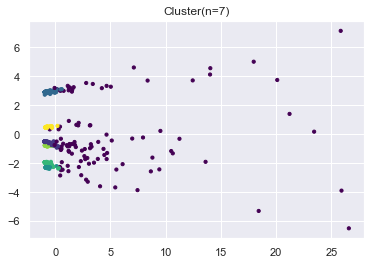

For Cluster(n=7), the Average Silhouette Score: 0.5786066550077273


In [9]:
from sklearn.decomposition import PCA

mdl2 = PCA(n_components=2)
mdl2.fit(standardizedVariables)
standardizedVariablesPCA = mdl2.transform(standardizedVariables)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

clusterLabel = yearlyTableDf["Cluster"]
plt.title("Cluster(n="+str(len(clusterGroup))+")")
plt.scatter(standardizedVariablesPCA[:yearlyTableDf.shape[0], 0], standardizedVariablesPCA[:yearlyTableDf.shape[0], 1], c=clusterLabel, s=10, cmap="viridis")
plt.show()
silhouette_avg = silhouette_score(standardizedVariables, clusterLabel)
print("For Cluster(n="+str(len(clusterGroup))+"), the Average Silhouette Score:", silhouette_avg)

# GaussianMixture

In [10]:
import pandas as pd

# adjustable item 1: csv
yearlyTableDf = pd.read_csv("mini_2019_table.csv")

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,type,continent,iso_country,country_name,state,iso_region,gps_code,local_code,municipality,tz
0,KLCK,0,0,0,1,0,0,0,1,0,...,large_airport,NA_,US,United States,Ohio,US-OH,KLCK,LCK,Columbus,America/New_York
1,KPDK,2,1,1,1,3,0,0,2,0,...,medium_airport,NA_,US,United States,Georgia,US-GA,KPDK,PDK,Atlanta,America/New_York
2,LYBE,0,0,0,1,0,0,0,1,0,...,large_airport,EU,RS,Serbia,NaN,RS-00,LYBE,NaN,Belgrade,Europe/Belgrade
3,RPUF,0,0,0,0,0,0,2,0,0,...,small_airport,AS,PH,Philippines,Central-Luzon,PH-PAM,RPUF,NaN,Floridablanca,Asia/Manila
4,WN61,0,1,0,0,0,0,1,0,0,...,small_airport,NA_,US,United States,Washington,US-WA,WN61,WN61,Spokane,America/Los_Angeles


In [11]:
from sklearn import preprocessing

# adjustable item 2: selected fields for clustering
selectedFields = ["domestic_origin", "domestic_destination", "international_origin", "international_destination", "day_origin", "night_origin", "day_destination", "night_destination", "long_origin", "medium_origin", "short_origin", "long_destination", "medium_destination", "short_destination", "AVG_TEMP", "AVG_MAX", "AVG_MIN", "AVG_PRCP"]

scaler = preprocessing.StandardScaler().fit(yearlyTableDf[selectedFields])
standardizedVariables = scaler.transform(yearlyTableDf[selectedFields])

from sklearn.mixture import GaussianMixture

# adjustable item 3: number of cluster
minNumCluster = 2
maxNumCluster = 9

for i in range(minNumCluster, maxNumCluster+1):
    mdl1 = GaussianMixture(n_components=i, random_state=0)
    yearlyTableDf["Cluster(n="+str(i)+")"] = mdl1.fit(standardizedVariables).predict(standardizedVariables)

yearlyTableDf.head()

,icao_code,domestic_origin,domestic_destination,international_origin,international_destination,day_origin,night_origin,day_destination,night_destination,jan_origin,...,municipality,tz,Cluster(n=2),Cluster(n=3),Cluster(n=4),Cluster(n=5),Cluster(n=6),Cluster(n=7),Cluster(n=8),Cluster(n=9)
0,KLCK,0,0,0,1,0,0,0,1,0,...,Columbus,America/New_York,1,1,1,1,1,1,7,7
1,KPDK,2,1,1,1,3,0,0,2,0,...,Atlanta,America/New_York,1,1,1,1,1,1,7,7
2,LYBE,0,0,0,1,0,0,0,1,0,...,Belgrade,Europe/Belgrade,0,0,0,0,0,0,0,0
3,RPUF,0,0,0,0,0,0,2,0,0,...,Floridablanca,Asia/Manila,1,1,1,1,1,1,1,1
4,WN61,0,1,0,0,0,0,1,0,0,...,Spokane,America/Los_Angeles,1,1,1,1,1,1,7,7


In [12]:
from sklearn.metrics import silhouette_score

for i in range(minNumCluster, maxNumCluster+1):
    clusterLabel = yearlyTableDf["Cluster(n="+str(i)+")"]
    silhouette_avg = silhouette_score(standardizedVariables, clusterLabel)
    for j in range(0, i):
        print("Cluster(n="+str(i)+") Group"+str(j)+" Row Counts: "+str(yearlyTableDf[clusterLabel==j].shape[0]))
    print("For Cluster(n="+str(i)+"), the Average Silhouette Score:", silhouette_avg)
    print("----------------------------------------------------------------------------------------------------")

Cluster(n=2) Group0 Row Counts: 321
Cluster(n=2) Group1 Row Counts: 437
For Cluster(n=2), the Average Silhouette Score: 0.37937318119218033
----------------------------------------------------------------------------------------------------
Cluster(n=3) Group0 Row Counts: 166
Cluster(n=3) Group1 Row Counts: 439
Cluster(n=3) Group2 Row Counts: 153
For Cluster(n=3), the Average Silhouette Score: 0.5105268906697378
----------------------------------------------------------------------------------------------------
Cluster(n=4) Group0 Row Counts: 166
Cluster(n=4) Group1 Row Counts: 432
Cluster(n=4) Group2 Row Counts: 10
Cluster(n=4) Group3 Row Counts: 150
For Cluster(n=4), the Average Silhouette Score: 0.5186228995650505
----------------------------------------------------------------------------------------------------
Cluster(n=5) Group0 Row Counts: 167
Cluster(n=5) Group1 Row Counts: 427
Cluster(n=5) Group2 Row Counts: 3
Cluster(n=5) Group3 Row Counts: 151
Cluster(n=5) Group4 Row Counts

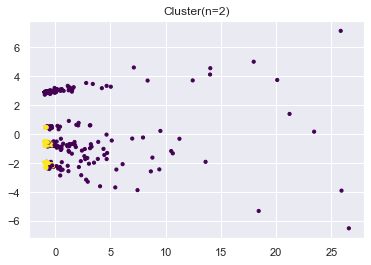

For Cluster(n=2), the Average Silhouette Score: 0.37937318119218033 



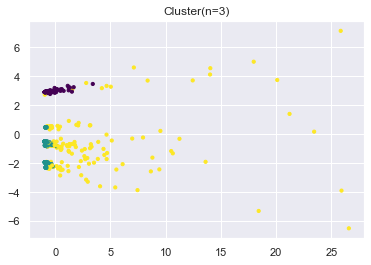

For Cluster(n=3), the Average Silhouette Score: 0.5105268906697378 



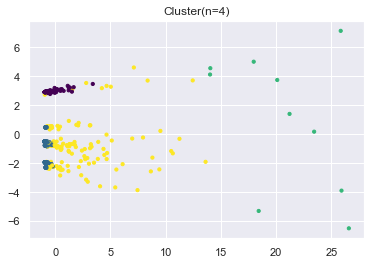

For Cluster(n=4), the Average Silhouette Score: 0.5186228995650505 



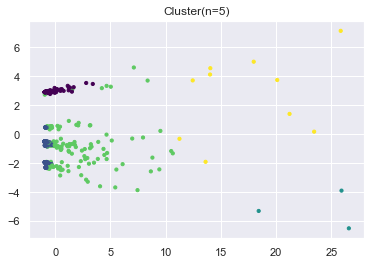

For Cluster(n=5), the Average Silhouette Score: 0.5157783043653954 



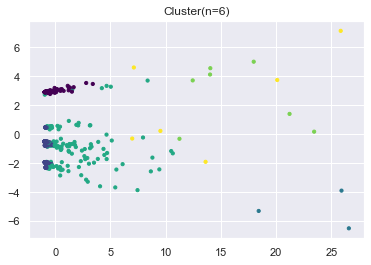

For Cluster(n=6), the Average Silhouette Score: 0.5174640708821948 



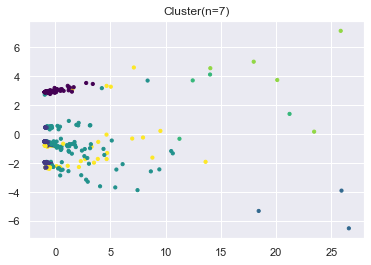

For Cluster(n=7), the Average Silhouette Score: 0.45831780408846123 



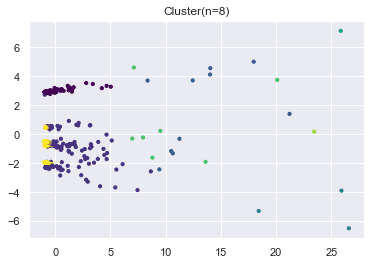

For Cluster(n=8), the Average Silhouette Score: 0.5090732973391163 



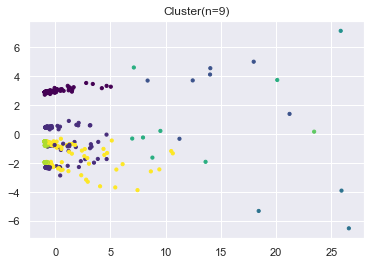

For Cluster(n=9), the Average Silhouette Score: 0.4611457821576679 



In [13]:
from sklearn.decomposition import PCA

mdl2 = PCA(n_components=2)
mdl2.fit(standardizedVariables)
standardizedVariablesPCA = mdl2.transform(standardizedVariables)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

for i in range(minNumCluster, maxNumCluster+1):
    clusterLabel = yearlyTableDf["Cluster(n="+str(i)+")"]
    plt.title("Cluster(n="+str(i)+")")
    plt.scatter(standardizedVariablesPCA[:yearlyTableDf.shape[0], 0], standardizedVariablesPCA[:yearlyTableDf.shape[0], 1], c=clusterLabel, s=10, cmap="viridis")
    plt.show()
    silhouette_avg = silhouette_score(standardizedVariables, clusterLabel)
    print("For Cluster(n="+str(i)+"), the Average Silhouette Score:", silhouette_avg, "\n")